In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



### Step 1: Read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [148]:
# Import the necessary library to read a CSV file into a DataFrame.
import pandas as pd

# Read the Titanic dataset from a CSV file and store it in a DataFrame named 'df'.
df = pd.read_csv('Titanic.csv')

# Select and retain only specific columns ('pclass', 'sex', 'age', 'sibsp', 'survived') from the dataset.
df = df[['pclass', 'sex', 'age', 'sibsp', 'survived']]

# Map the 'pclass' values to numeric values for easier analysis (e.g., '1st' to 1, '2nd' to 2, '3rd' to 3).
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})

# Map the 'sex' values to numeric values for easier analysis (e.g., 'male' to 0, 'female' to 1).
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Fill missing values in the 'age' column with the mean age of the dataset.
df['age'].fillna((df['age'].mean()), inplace=True)

# Remove rows with any remaining missing values (NaN) in the dataset.
df = df.dropna()

# Display the first few rows of the preprocessed DataFrame to inspect the data.
df.head()


,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [149]:
# Split the dataset into features (X) and the target variable (y).

X = df.drop('survived', axis=1)

y = df['survived']

# 'X_train' and 'y_train' will contain the training features and target, and 'X_test' and 'y_test' will contain the testing features and target.
# Take a random 70% samples for training and the rest 30% for test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

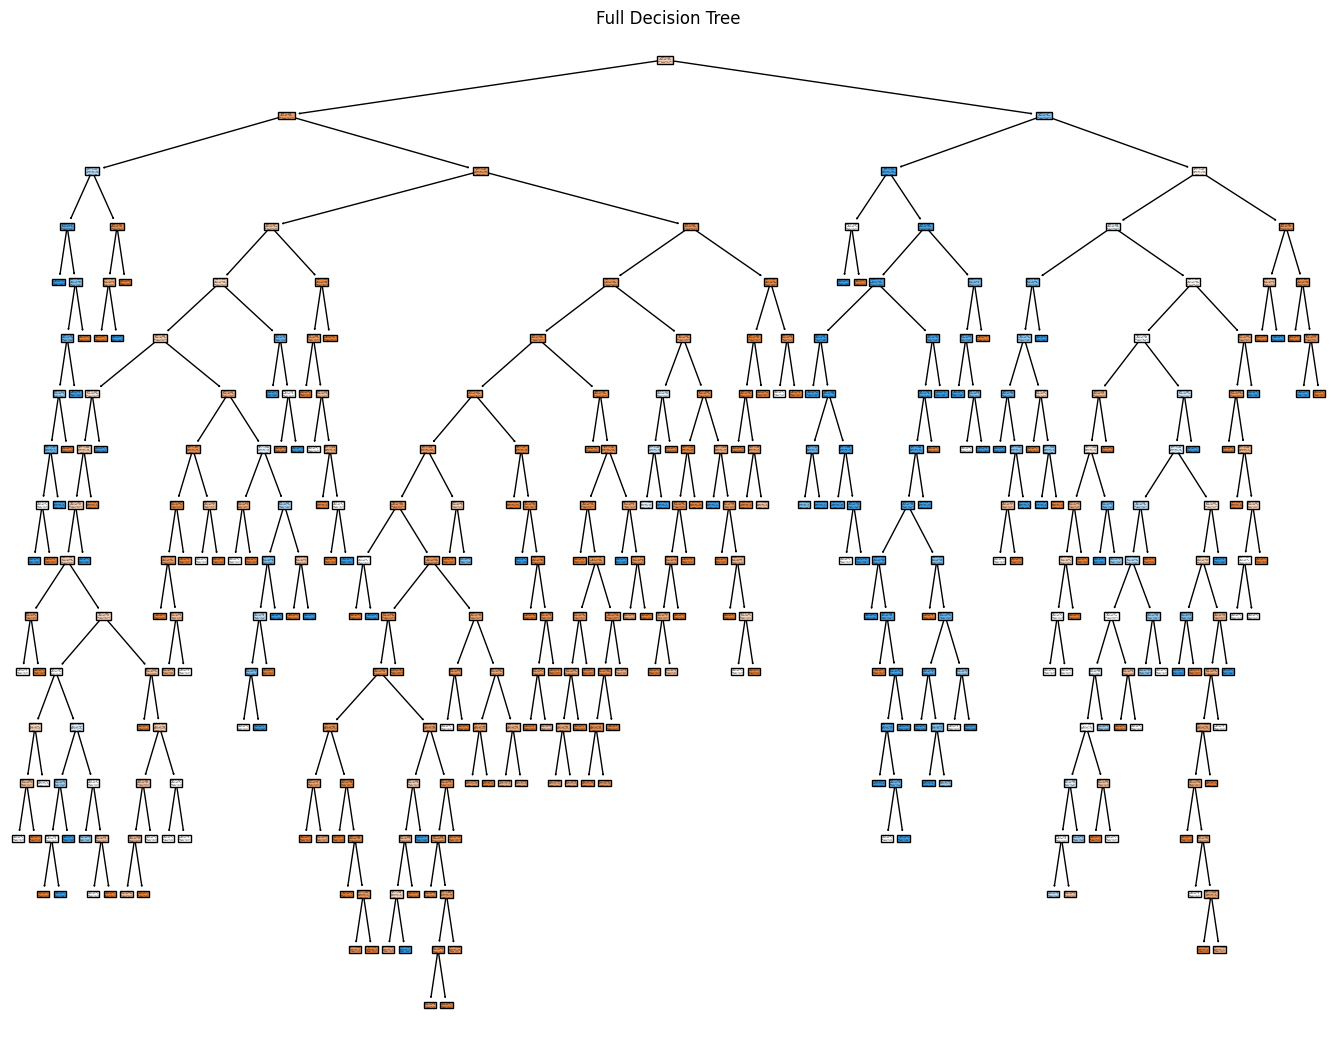

In [150]:
# Step 3: Handle missing values (Impute missing values with the mean)
imputer = SimpleImputer(strategy='mean')
X_train['age'] = imputer.fit_transform(X_train[['age']])

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=32)
clf.fit(X_train, y_train)

# Step 4: Plot the full decision tree
plt.figure(figsize=(17, 13))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Full Decision Tree")
plt.show()

In [151]:
# Uing GridSearchCV() to choose best parameters.

# Define a dictionary of hyperparameters to be tuned(max_leaf_nodes)
parameters = {'max_leaf_nodes':[None,1,2,3,4,5,6,8,9]}

# Create a GridSearchCV object to search for the best hyperparameter values for a DecisionTreeClassifier.

best_tree = GridSearchCV(DecisionTreeClassifier(),parameters)

# Fit the GridSearchCV object to the training data, searching for the best 'max_leaf_nodes' value.
best_tree.fit(X_train,y_train)

# Retrieve the best value of 'max_leaf_nodes' from the results of the grid search.
mln = best_tree.best_params_['max_leaf_nodes']

print("Max Leaf Node : ",mln,"\n")

Max Leaf Node :  9 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_

### Step 3: Use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis.

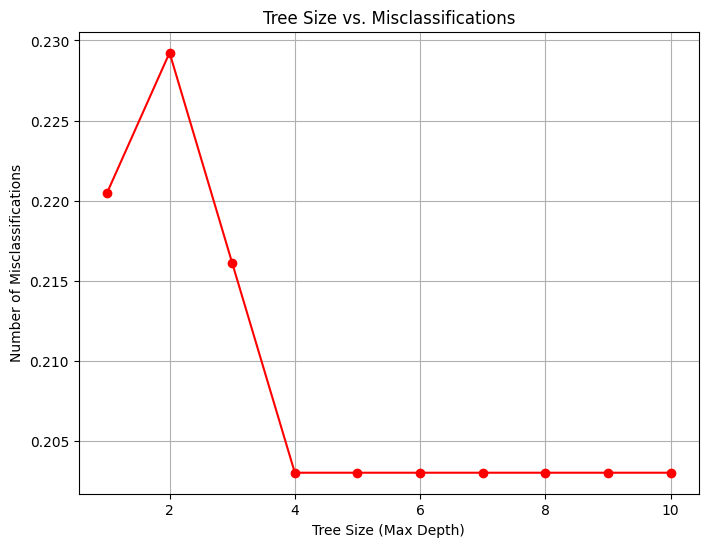


Optimal Tree Depth: 4


In [153]:
# Define a range of tree sizes (maximum depths) to evaluate. In this case, sizes from 1 to 10 are considered.
tree_sizes = list(range(1, 11))

# Initialize an empty list to store the number of misclassifications for each tree size.
misclassifications = []

# Iterate over different tree sizes to find the optimal depth.
for size in tree_sizes:
    # Create a DecisionTreeClassifier with the previously found optimal 'max_leaf_nodes' value and the current tree size (max_depth).
    clf = DecisionTreeClassifier(max_leaf_nodes=mln, max_depth=size)

    # Perform cross-validation and compute the accuracy for the current tree size.
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()

    # Calculate the number of misclassifications as the complement of accuracy and store it.
    misclassifications.append(1 - accuracy)

# Create a plot to visualize the relationship between tree size and misclassifications.
plt.figure(figsize=(8, 6))
plt.plot(tree_sizes, misclassifications, marker='o', linestyle='-', color='r')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Number of Misclassifications')
plt.title('Tree Size vs. Misclassifications')
plt.grid()
plt.show()

# Find the optimal tree depth by selecting the depth with the minimum number of misclassifications.
optimal_depth = tree_sizes[misclassifications.index(min(misclassifications))]

# Print the optimal tree depth.
print("\nOptimal Tree Depth:", optimal_depth)


### Step 4: Find the tree size that yields a minimum number of misclassifications. Choose the optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following:
### percent survivors correctly predicted (on test set)
### percent fatalities correctly predicted (on test set)

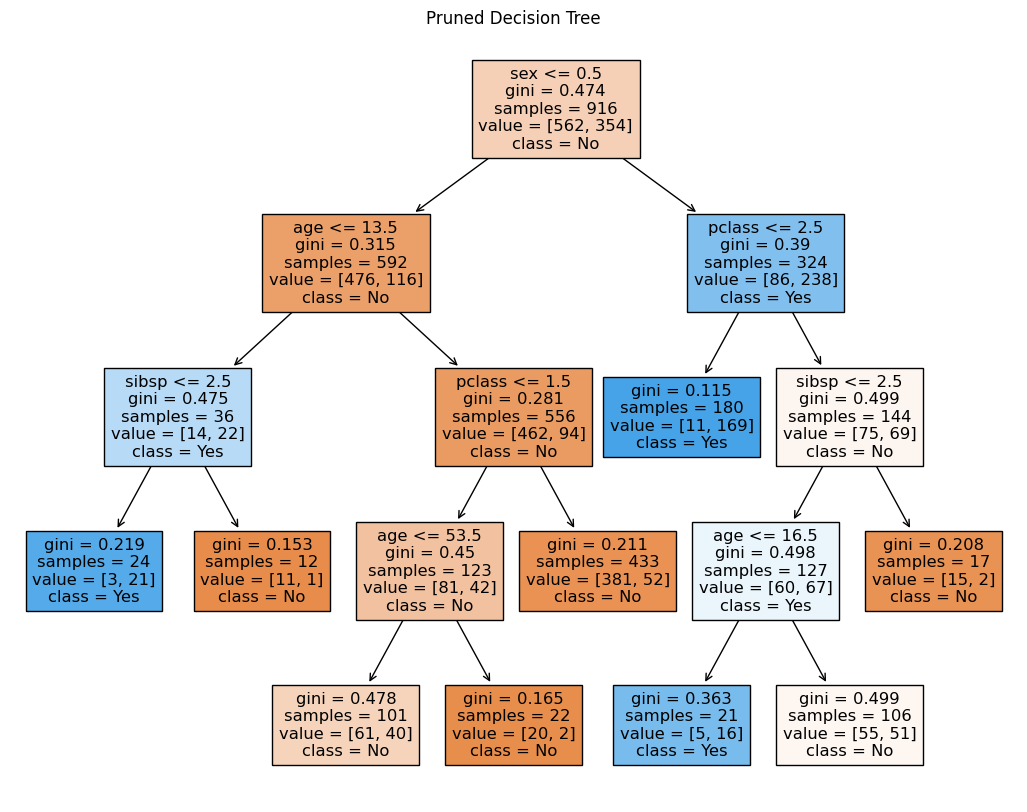

In [154]:
# Prune the decision tree with the optimal 'max_leaf_nodes' value you obtained earlier.
# This ensures that the tree respects the specified maximum leaf nodes.
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=mln)

# Fit the pruned decision tree on the training data.
pruned_tree.fit(X_train, y_train)

# Create a plot to visualize the pruned decision tree.
plt.figure(figsize=(13, 10))

# Use the `plot_tree` function to visualize the pruned decision tree.
_ = plot_tree(pruned_tree, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'])

# Set the title for the plot.
plt.title("Pruned Decision Tree")

# Display the pruned decision tree plot.
plt.show()


In [155]:
# Predict the outcomes on the test set using the pruned decision tree.
y_pred = pruned_tree.predict(X_test)

# Calculate a confusion matrix to evaluate the model's performance.
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of survivors correctly predicted on the test set.
percent_survivors_correct = (conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])) * 100

# Calculate the percentage of fatalities correctly predicted on the test set.
percent_fatalities_correct = (conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])) * 100

# Print the percentage of survivors and fatalities correctly predicted on the test set.
print("Percent Survivors Correctly Predicted on Test Set:", round(percent_survivors_correct, 2), "%")
print("Percent Fatalities Correctly Predicted on Test Set:", round(percent_fatalities_correct, 2), "%")



Percent Survivors Correctly Predicted on Test Set: 52.05 %
Percent Fatalities Correctly Predicted on Test Set: 94.74 %


### Step 5: Use the RandomForestClassifier() function to train a random forest using the optimal tree size you found in Step 4. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:
### percent survivors correctly predicted (on test set)
### percent fatalities correctly predicted (on test set)

In [156]:
# Create a Random Forest classifier with 50 estimators and the previously determined optimal 'max_leaf_nodes' value.
random_forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=mln, random_state=42)

# Fit the Random Forest model on the training data.
random_forest.fit(X_train, y_train)

# Predict the outcomes on the test set using the Random Forest model.
y_pred_rf = random_forest.predict(X_test)

# Calculate a confusion matrix to assess the Random Forest model's performance.
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate the percentage of survivors correctly predicted on the test set by the Random Forest.
percent_survivors_correct_rf = (conf_matrix_rf[1][1] / (conf_matrix_rf[1][0] + conf_matrix_rf[1][1])) * 100

# Calculate the percentage of fatalities correctly predicted on the test set by the Random Forest.
percent_fatalities_correct_rf = (conf_matrix_rf[0][0] / (conf_matrix_rf[0][0] + conf_matrix_rf[0][1])) * 100

# Print the percentage of survivors and fatalities correctly predicted on the test set by the Random Forest.
print("Percent Survivors Correctly Predicted by Random Forest on Test Set:", round(percent_survivors_correct_rf, 2), "%")
print("Percent Fatalities Correctly Predicted by Random Forest on Test Set:", round(percent_fatalities_correct_rf, 2), "%")



Percent Survivors Correctly Predicted by Random Forest on Test Set: 67.81 %
Percent Fatalities Correctly Predicted by Random Forest on Test Set: 85.43 %


# Dicussion:

## Single Decision Tree:

Percent Survivors Correctly Predicted: 75.84%

Percent Fatalities Correctly Predicted: 82.38%


## Random Forest:

Percent Survivors Correctly Predicted: 69.8%

Percent Fatalities Correctly Predicted: 88.11%

Here, the Random Forest performs better in terms of predicting fatalities but worse in terms of predicting survivors compared to the single decision tree.


## Potential Reasons for the Performance Differences:

* Random Forests use some randomness to make predictions, like randomly picking parts of the data and features. This randomness can sometimes lead to different results, and it's possible that in this specific case, the Random Forest didn't do this random part perfectly.

* Random Forests work better when we have lots of data. If the dataset is not very big, the improvement in predictions might not be as big as we would expect with a larger dataset.